In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [4]:
longterm_frgn = pd.read_csv('/content/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV', encoding = 'cp949')
food_waste_month = pd.read_csv('food_waste_month.csv', encoding = 'cp949')

Y 데이터 업로드 및 전처리 

In [5]:
food_waste_month

,base_date,emd_nm,sum(em_cnt),sum(em_g),sum(pay_amt)
0,2018-01,건입동,18416,45646550,1364804
1,2018-01,남원읍,9570,42437700,1270773
2,2018-01,노형동,113990,265018400,7883340
3,2018-01,대륜동,21666,57612600,1676850
4,2018-01,대정읍,10185,38885550,1164122
...,...,...,...,...,...
1661,2021-06,표선면,10751,42453750,1271419
1662,2021-06,한경면,8031,27060150,809898
1663,2021-06,한림읍,25653,82746990,2476292
1664,2021-06,화북동,66088,110750050,3306029


In [6]:
food_waste_month['base_date'] = pd.to_datetime(food_waste_month['base_date'])
food_waste_month['year'] = food_waste_month['base_date'].dt.year
food_waste_month['month'] = food_waste_month['base_date'].dt.month

In [7]:
food_waste_month = food_waste_month[['year', 'month', 'emd_nm', 'sum(em_g)']]

In [8]:
food_waste_month

,year,month,emd_nm,sum(em_g)
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,42453750
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


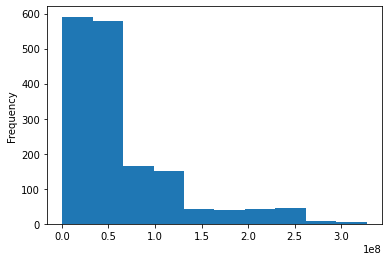

In [9]:
food_waste_month['sum(em_g)'].plot.hist()

In [10]:
food_waste_month['sum(em_g)'] = np.log(food_waste_month[['sum(em_g)']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


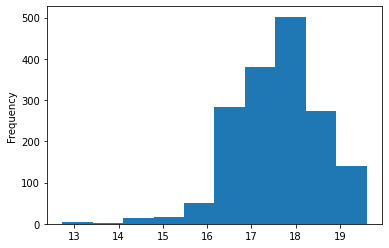

In [11]:
food_waste_month['sum(em_g)'].plot.hist()

In [12]:
scaler = StandardScaler()
food_waste_month['sum(em_g)'] = scaler.fit_transform(food_waste_month[['sum(em_g)']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
food_waste_month

,year,month,emd_nm,sum(em_g)
0,2018,1,건입동,0.064537
1,2018,1,남원읍,-0.011915
2,2018,1,노형동,1.909326
3,2018,1,대륜동,0.308722
4,2018,1,대정읍,-0.103599
...,...,...,...,...
1661,2021,6,표선면,-0.011518
1662,2021,6,한경면,-0.483871
1663,2021,6,한림읍,0.688454
1664,2021,6,화북동,0.994181


long_term데이터 업로드 및 전처리

In [14]:
longterm_frgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주


In [15]:
longterm_frgn['base_date'] = pd.to_datetime(longterm_frgn['base_date'], errors="ignore")
longterm_frgn['year'] = longterm_frgn['base_date'].dt.year
longterm_frgn['month'] = longterm_frgn['base_date'].dt.month

In [16]:
longterm_frgn = longterm_frgn.groupby(['year', 'month', 'emd_nm', 'time', 'nationality'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
longterm_frgn.head()

,year,month,emd_nm,time,nationality,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018,1,건입동,1,AUS,0.0000,0.0000,5.6586
1,2018,1,건입동,1,BGD,0.0000,0.0000,6.4670
2,2018,1,건입동,1,CAN,0.0000,0.0000,30.2977
3,2018,1,건입동,1,CHN,1723.8665,245.5062,1338.1190
4,2018,1,건입동,1,ETC,108.4807,0.0000,40.6825


In [18]:
longterm_frgn.loc[:, ['time','resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']].corr()

,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
time,1.000000,-0.018246,0.016460,0.022720
resd_pop_cnt,-0.018246,1.000000,0.762858,0.792754
work_pop_cnt,0.016460,0.762858,1.000000,0.741841
visit_pop_cnt,0.022720,0.792754,0.741841,1.000000


In [19]:
longterm_frgn1 = longterm_frgn.copy()
longterm_frgn2 = longterm_frgn.copy()
longterm_frgn3 = longterm_frgn.copy()

In [20]:
# 더미변수 처리

In [21]:
longterm_frgn = pd.get_dummies(longterm_frgn, columns = ['time'])
longterm_frgn = pd.get_dummies(longterm_frgn, columns = ['nationality'] )

In [22]:
longterm_frgn.head()

,year,month,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,time_24,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_EGY,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NGR,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM
0,2018,1,건입동,0.0000,0.0000,5.6586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,0.0000,0.0000,6.4670,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,1,건입동,0.0000,0.0000,30.2977,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,1,건입동,1723.8665,245.5062,1338.1190,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,1,건입동,108.4807,0.0000,40.6825,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
longterm_frgn['1am_cnt'] = longterm_frgn['time_1'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['2am_cnt'] = longterm_frgn['time_2'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['3am_cnt'] = longterm_frgn['time_3'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['4am_cnt'] = longterm_frgn['time_4'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['5am_cnt'] = longterm_frgn['time_5'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['6am_cnt'] = longterm_frgn['time_6'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['7am_cnt'] = longterm_frgn['time_7'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['8am_cnt'] = longterm_frgn['time_8'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['9am_cnt'] = longterm_frgn['time_9'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['10am_cnt'] = longterm_frgn['time_10'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['11am_cnt'] = longterm_frgn['time_11'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['12pm_cnt'] = longterm_frgn['time_12'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['1pm_cnt'] = longterm_frgn['time_13'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['2pm_cnt'] = longterm_frgn['time_14'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['3pm_cnt'] = longterm_frgn['time_15'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['4pm_cnt'] = longterm_frgn['time_16'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['5pm_cnt'] = longterm_frgn['time_17'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['6pm_cnt'] = longterm_frgn['time_18'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['7pm_cnt'] = longterm_frgn['time_19'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['8pm_cnt'] = longterm_frgn['time_20'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['9pm_cnt'] = longterm_frgn['time_21'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['10pm_cnt'] = longterm_frgn['time_22'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['11pm_cnt'] = longterm_frgn['time_23'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['12am_cnt'] = longterm_frgn['time_24'] * longterm_frgn['resd_pop_cnt']

In [24]:
longterm_frgn['AUS_cnt'] = longterm_frgn['nationality_AUS'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['BGD_cnt'] = longterm_frgn['nationality_BGD'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['CAN_cnt'] = longterm_frgn['nationality_CAN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['CHN_cnt'] = longterm_frgn['nationality_CHN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['DEU_cnt'] = longterm_frgn['nationality_DEU'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['ETC_cnt'] = longterm_frgn['nationality_ETC'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['FRA_cnt'] = longterm_frgn['nationality_FRA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['GBR_cnt'] = longterm_frgn['nationality_GBR'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['IDN_cnt'] = longterm_frgn['nationality_IDN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['IND_cnt'] = longterm_frgn['nationality_IND'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['JPN_cnt'] = longterm_frgn['nationality_JPN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['KAZ_cnt'] = longterm_frgn['nationality_KAZ'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['KGZ_cnt'] = longterm_frgn['nationality_KGZ'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['KHM_cnt'] = longterm_frgn['nationality_KHM'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['LKA_cnt'] = longterm_frgn['nationality_LKA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['MGL_cnt'] = longterm_frgn['nationality_MGL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['MMR_cnt'] = longterm_frgn['nationality_MMR'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['MYS_cnt'] = longterm_frgn['nationality_MYS'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['NPL_cnt'] = longterm_frgn['nationality_NPL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['NZL_cnt'] = longterm_frgn['nationality_NZL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['PAK_cnt'] = longterm_frgn['nationality_PAK'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['PHL_cnt'] = longterm_frgn['nationality_PHL'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['RUS_cnt'] = longterm_frgn['nationality_RUS'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['THA_cnt'] = longterm_frgn['nationality_THA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['TWN_cnt'] = longterm_frgn['nationality_TWN'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['UKR_cnt'] = longterm_frgn['nationality_UKR'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['USA_cnt'] = longterm_frgn['nationality_USA'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['UZB_cnt'] = longterm_frgn['nationality_UZB'] * longterm_frgn['resd_pop_cnt']
longterm_frgn['VNM_cnt'] = longterm_frgn['nationality_VNM'] * longterm_frgn['resd_pop_cnt']


In [25]:
longterm_frgn = longterm_frgn.groupby(['year', 'month', 'emd_nm'])['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt', '5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt', '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', 
                                                                   '2pm_cnt','3pm_cnt', '4pm_cnt', '5pm_cnt', '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt',
                                                                   'AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [26]:
longterm_frgn.head()

,year,month,emd_nm,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,5524.1063,5509.0290,5472.0863,5450.6603,5421.8114,5218.8648,4963.6550,4788.2358,4303.4613,4001.0681,3811.2874,3626.6950,3388.1390,3320.7182,3398.8084,3285.8827,3348.7156,3201.6746,3422.3829,3595.6255,3588.7183,3725.0230,3950.3129,5487.4810,0.0000,0.0,0.0000,2.930189e+04,0.0000,1082.1374,0.0000,0.0000,19202.5362,0.0,6112.1112,0.0,0.0,0.0000,5896.4162,0.0000,631.6296,0.0,4668.3935,0.0000,0.0,6598.8492,0.0000,0.0000,7572.7845,0.0,1591.5801,0.0000,19146.1103
1,2018,1,구좌읍,9810.1336,9824.3834,9810.4177,9814.4833,9797.0216,9775.7094,9676.4469,9554.8005,9471.0789,9047.4323,9011.2126,8805.2750,8775.3469,8732.5335,8673.1843,8752.1786,8814.1475,8901.8563,8738.2893,8757.2051,8822.1707,9011.9410,9255.3598,9736.7756,0.0000,0.0,1225.3715,6.272187e+04,0.0000,0.0000,0.0000,0.0000,17382.4063,0.0,2753.8385,0.0,0.0,18215.9307,22361.6347,0.0000,4364.4379,0.0,37326.9236,0.0000,0.0,14050.7858,3599.0668,4623.8665,0.0000,0.0,4995.9904,3359.0640,24388.1983
2,2018,1,남원읍,9551.2555,9550.1712,9538.8017,9494.3105,9541.7339,9492.0695,9390.4778,9220.9663,9039.5247,8965.5941,8766.6030,8687.4417,8603.0601,8594.5833,8497.9128,8387.6269,8294.2151,8358.1209,8418.4285,8398.0920,8564.1075,8699.6678,8763.1093,9569.1687,0.0000,0.0,0.0000,4.162279e+04,0.0000,0.0000,0.0000,0.0000,34150.7049,0.0,0.0000,0.0,0.0,22491.4838,43569.4815,0.0000,4062.3581,0.0,31322.6448,0.0000,0.0,14523.8228,0.0000,0.0000,0.0000,0.0,253.6469,0.0000,22390.1123
3,2018,1,노형동,68633.7975,69575.7056,69636.8964,69776.6199,69489.2728,69241.6527,68517.5925,66586.6532,62644.6584,57139.8326,53399.4247,51296.3887,48764.0105,47203.9469,46656.1792,46669.1123,47146.4491,48387.5943,51326.2993,53154.6159,54495.5675,55432.1599,57731.4132,68259.3902,11855.9924,0.0,33478.3141,1.037619e+06,0.0000,14607.8193,1587.3216,2595.3553,953.1589,0.0,26857.8155,0.0,0.0,19608.6107,3470.9789,11185.2103,2805.9870,0.0,10325.6603,0.0000,0.0,5608.5013,4953.1242,7189.3341,28256.7489,0.0,38468.1249,2067.2869,137670.6870
4,2018,1,대륜동,5621.2940,5602.0782,5562.9411,5573.7536,5560.7543,5524.9187,5302.5699,5005.5090,4823.3870,4572.3351,4398.7346,4174.5376,4029.2257,3935.2795,3899.2405,3801.0286,3986.0420,3864.5132,3977.8272,4123.2279,4225.1640,4301.7919,4390.5798,5697.1854,2701.0357,0.0,4561.4983,4.789321e+04,1271.6304,8148.4021,0.0000,2768.6814,0.0000,0.0,3908.9557,0.0,0.0,5465.3049,0.0000,0.0000,0.0000,0.0,0.0000,3153.1699,0.0,3869.4986,2319.2201,0.0000,9250.4552,0.0,16642.8563,0.0000,0.0000


In [27]:
# 시간 더미변수 

In [28]:
longterm_frgn1 = pd.get_dummies(longterm_frgn1, columns = ['time'])

In [29]:
longterm_frgn1['1am_cnt'] = longterm_frgn1['time_1'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['2am_cnt'] = longterm_frgn1['time_2'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['3am_cnt'] = longterm_frgn1['time_3'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['4am_cnt'] = longterm_frgn1['time_4'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['5am_cnt'] = longterm_frgn1['time_5'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['6am_cnt'] = longterm_frgn1['time_6'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['7am_cnt'] = longterm_frgn1['time_7'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['8am_cnt'] = longterm_frgn1['time_8'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['9am_cnt'] = longterm_frgn1['time_9'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['10am_cnt'] = longterm_frgn1['time_10'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['11am_cnt'] = longterm_frgn1['time_11'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['12pm_cnt'] = longterm_frgn1['time_12'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['1pm_cnt'] = longterm_frgn1['time_13'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['2pm_cnt'] = longterm_frgn1['time_14'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['3pm_cnt'] = longterm_frgn1['time_15'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['4pm_cnt'] = longterm_frgn1['time_16'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['5pm_cnt'] = longterm_frgn1['time_17'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['6pm_cnt'] = longterm_frgn1['time_18'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['7pm_cnt'] = longterm_frgn1['time_19'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['8pm_cnt'] = longterm_frgn1['time_20'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['9pm_cnt'] = longterm_frgn1['time_21'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['10pm_cnt'] = longterm_frgn1['time_22'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['11pm_cnt'] = longterm_frgn1['time_23'] * longterm_frgn1['resd_pop_cnt']
longterm_frgn1['12am_cnt'] = longterm_frgn1['time_24'] * longterm_frgn1['resd_pop_cnt']

In [30]:
longterm_frgn1

,year,month,emd_nm,nationality,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,time_24,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
0,2018,1,건입동,AUS,0.0000,0.0000,5.6586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
1,2018,1,건입동,BGD,0.0000,0.0000,6.4670,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
2,2018,1,건입동,CAN,0.0000,0.0000,30.2977,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
3,2018,1,건입동,CHN,1723.8665,245.5062,1338.1190,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1723.8665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
4,2018,1,건입동,ETC,108.4807,0.0000,40.6825,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108.4807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103576,2018,5,효돈동,USA,0.0000,6.1748,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
103577,2018,5,효돈동,CHN,6.7069,0.0000,4.8467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7069,0.0,0.0,0.0
103578,2018,5,효돈동,IDN,0.0000,0.0000,3.9600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
103579,2018,5,효돈동,KHM,8.5348,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5348,0.0,0.0,0.0


In [31]:
longterm_frgn1 = longterm_frgn1.groupby(['year', 'month', 'emd_nm'])['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt','5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt', '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', 
                                                                   '2pm_cnt','3pm_cnt', '4pm_cnt', '5pm_cnt', '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [32]:
longterm_frgn1

,year,month,emd_nm,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
0,2018,1,건입동,5524.1063,5509.0290,5472.0863,5450.6603,5421.8114,5218.8648,4963.6550,4788.2358,4303.4613,4001.0681,3811.2874,3626.6950,3388.1390,3320.7182,3398.8084,3285.8827,3348.7156,3201.6746,3422.3829,3595.6255,3588.7183,3725.0230,3950.3129,5487.4810
1,2018,1,구좌읍,9810.1336,9824.3834,9810.4177,9814.4833,9797.0216,9775.7094,9676.4469,9554.8005,9471.0789,9047.4323,9011.2126,8805.2750,8775.3469,8732.5335,8673.1843,8752.1786,8814.1475,8901.8563,8738.2893,8757.2051,8822.1707,9011.9410,9255.3598,9736.7756
2,2018,1,남원읍,9551.2555,9550.1712,9538.8017,9494.3105,9541.7339,9492.0695,9390.4778,9220.9663,9039.5247,8965.5941,8766.6030,8687.4417,8603.0601,8594.5833,8497.9128,8387.6269,8294.2151,8358.1209,8418.4285,8398.0920,8564.1075,8699.6678,8763.1093,9569.1687
3,2018,1,노형동,68633.7975,69575.7056,69636.8964,69776.6199,69489.2728,69241.6527,68517.5925,66586.6532,62644.6584,57139.8326,53399.4247,51296.3887,48764.0105,47203.9469,46656.1792,46669.1123,47146.4491,48387.5943,51326.2993,53154.6159,54495.5675,55432.1599,57731.4132,68259.3902
4,2018,1,대륜동,5621.2940,5602.0782,5562.9411,5573.7536,5560.7543,5524.9187,5302.5699,5005.5090,4823.3870,4572.3351,4398.7346,4174.5376,4029.2257,3935.2795,3899.2405,3801.0286,3986.0420,3864.5132,3977.8272,4123.2279,4225.1640,4301.7919,4390.5798,5697.1854
5,2018,1,대정읍,40496.3711,40385.2753,40186.1917,40138.4600,40063.0598,39538.3239,38974.5415,36453.4355,34176.1819,32487.6930,31309.1365,30029.7002,29388.9222,28797.2515,28842.4090,28531.5048,29529.4944,30927.9287,31440.2613,31798.7747,32080.9022,32077.4774,32553.3092,40784.1204
6,2018,1,대천동,5670.6068,5706.9873,5691.3998,5679.6893,5676.5151,5700.4637,5403.7831,5057.3082,3993.2454,3762.7150,3651.7263,3504.2814,3395.3299,3247.9816,3169.6528,3058.7092,3190.2317,3343.7638,3586.7619,3709.0836,3923.5448,4230.0686,4207.2607,5652.6724
7,2018,1,도두동,3383.6181,3396.1274,3449.1811,3457.3361,3443.9602,3424.5897,3401.7969,3314.7852,3039.9808,2677.1182,2522.5117,2486.4128,2495.5775,2486.7748,2364.0825,2368.1350,2406.8682,2488.1668,2511.6535,2558.6504,2636.2017,2788.3056,2768.8603,3405.1153
8,2018,1,동홍동,12255.2498,12155.4810,12103.8064,12066.3462,12071.4126,11915.5054,11169.5036,10042.8724,9290.3061,8854.2419,8277.5807,7929.9897,7774.1867,7430.3992,7468.3720,7513.3893,7643.2475,8285.6392,8755.6867,8722.0142,8716.3432,8877.0738,9073.4086,12274.7152
9,2018,1,봉개동,3067.1529,3035.0173,2990.6460,2956.5524,2954.9245,2938.0637,2735.8263,2420.7349,2218.1941,1937.8641,1877.2651,1790.9515,1654.8880,1598.0062,1582.0115,1658.6530,1710.7339,1744.0150,1873.0458,2032.1271,2094.2017,2127.0681,2134.6540,3090.8639


In [33]:
longterm_frgn1[['1am_cnt', '2am_cnt', '3am_cnt', '4am_cnt', '5am_cnt', '6am_cnt', '7am_cnt', '8am_cnt', '9am_cnt'
                                   , '10am_cnt', '11am_cnt', '12pm_cnt', '1pm_cnt', '2pm_cnt', '3pm_cnt', '4pm_cnt', '5pm_cnt',
                                   '6pm_cnt', '7pm_cnt', '8pm_cnt', '9pm_cnt', '10pm_cnt', '11pm_cnt', '12am_cnt']].corr().head()

,1am_cnt,2am_cnt,3am_cnt,4am_cnt,5am_cnt,6am_cnt,7am_cnt,8am_cnt,9am_cnt,10am_cnt,11am_cnt,12pm_cnt,1pm_cnt,2pm_cnt,3pm_cnt,4pm_cnt,5pm_cnt,6pm_cnt,7pm_cnt,8pm_cnt,9pm_cnt,10pm_cnt,11pm_cnt,12am_cnt
1am_cnt,1.000000,0.999988,0.999974,0.999958,0.999952,0.999903,0.999651,0.999027,0.998017,0.997157,0.996374,0.995994,0.995217,0.994517,0.994265,0.994409,0.994498,0.994498,0.995016,0.994981,0.995101,0.995292,0.995548,0.999749
2am_cnt,0.999988,1.000000,0.999993,0.999983,0.999977,0.999936,0.999697,0.999128,0.998112,0.997200,0.996395,0.996007,0.995205,0.994502,0.994245,0.994389,0.994499,0.994514,0.995068,0.995068,0.995211,0.995406,0.995687,0.999708
3am_cnt,0.999974,0.999993,1.000000,0.999996,0.999992,0.999954,0.999719,0.999185,0.998165,0.997222,0.996405,0.996013,0.995190,0.994494,0.994230,0.994369,0.994496,0.994523,0.995108,0.995139,0.995305,0.995515,0.995816,0.999669
4am_cnt,0.999958,0.999983,0.999996,1.000000,0.999996,0.999963,0.999735,0.999227,0.998207,0.997243,0.996418,0.996022,0.995178,0.994485,0.994218,0.994357,0.994492,0.994522,0.995121,0.995171,0.995353,0.995569,0.995885,0.999638
5am_cnt,0.999952,0.999977,0.999992,0.999996,1.000000,0.999968,0.999744,0.999242,0.998226,0.997264,0.996445,0.996053,0.995216,0.994520,0.994248,0.994381,0.994511,0.994542,0.995129,0.995181,0.995370,0.995597,0.995928,0.999622


In [34]:
# 시간은 모두 높은 상관관계를 갖고 있기 때문에 1시 데이터 사용  

In [35]:
# longterm_frgn['resd_pop_time'] = longterm_frgn['1am_cnt'] 

In [36]:
# 국적 더미변수 

In [37]:
longterm_frgn2 = pd.get_dummies(longterm_frgn2, columns = ['nationality'])

In [38]:
longterm_frgn2

,year,month,emd_nm,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_EGY,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NGR,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM
0,2018,1,건입동,1,0.0000,0.0000,5.6586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,1,0.0000,0.0000,6.4670,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,1,건입동,1,0.0000,0.0000,30.2977,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,1,건입동,1,1723.8665,245.5062,1338.1190,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,1,건입동,1,108.4807,0.0000,40.6825,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103576,2018,5,효돈동,20,0.0000,6.1748,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
103577,2018,5,효돈동,21,6.7069,0.0000,4.8467,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103578,2018,5,효돈동,21,0.0000,0.0000,3.9600,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103579,2018,5,효돈동,21,8.5348,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
longterm_frgn2['AUS_cnt'] = longterm_frgn2['nationality_AUS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['BGD_cnt'] = longterm_frgn2['nationality_BGD'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['CAN_cnt'] = longterm_frgn2['nationality_CAN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['CHN_cnt'] = longterm_frgn2['nationality_CHN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['DEU_cnt'] = longterm_frgn2['nationality_DEU'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['ETC_cnt'] = longterm_frgn2['nationality_ETC'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['FRA_cnt'] = longterm_frgn2['nationality_FRA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['GBR_cnt'] = longterm_frgn2['nationality_GBR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['IDN_cnt'] = longterm_frgn2['nationality_IDN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['IND_cnt'] = longterm_frgn2['nationality_IND'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['JPN_cnt'] = longterm_frgn2['nationality_JPN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KAZ_cnt'] = longterm_frgn2['nationality_KAZ'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KGZ_cnt'] = longterm_frgn2['nationality_KGZ'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['KHM_cnt'] = longterm_frgn2['nationality_KHM'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['LKA_cnt'] = longterm_frgn2['nationality_LKA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MGL_cnt'] = longterm_frgn2['nationality_MGL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MMR_cnt'] = longterm_frgn2['nationality_MMR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['MYS_cnt'] = longterm_frgn2['nationality_MYS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['NPL_cnt'] = longterm_frgn2['nationality_NPL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['NZL_cnt'] = longterm_frgn2['nationality_NZL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['PAK_cnt'] = longterm_frgn2['nationality_PAK'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['PHL_cnt'] = longterm_frgn2['nationality_PHL'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['RUS_cnt'] = longterm_frgn2['nationality_RUS'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['THA_cnt'] = longterm_frgn2['nationality_THA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['TWN_cnt'] = longterm_frgn2['nationality_TWN'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['UKR_cnt'] = longterm_frgn2['nationality_UKR'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['USA_cnt'] = longterm_frgn2['nationality_USA'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['UZB_cnt'] = longterm_frgn2['nationality_UZB'] * longterm_frgn2['resd_pop_cnt']
longterm_frgn2['VNM_cnt'] = longterm_frgn2['nationality_VNM'] * longterm_frgn2['resd_pop_cnt']

In [40]:
longterm_frgn2

,year,month,emd_nm,time,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,nationality_AUS,nationality_BGD,nationality_CAN,nationality_CHN,nationality_DEU,nationality_EGY,nationality_ETC,nationality_FRA,nationality_GBR,nationality_IDN,nationality_IND,nationality_JPN,nationality_KAZ,nationality_KGZ,nationality_KHM,nationality_LKA,nationality_MGL,nationality_MMR,nationality_MYS,nationality_NGR,nationality_NPL,nationality_NZL,nationality_PAK,nationality_PHL,nationality_RUS,nationality_THA,nationality_TWN,nationality_UKR,nationality_USA,nationality_UZB,nationality_VNM,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,1,0.0000,0.0000,5.6586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,1,건입동,1,0.0000,0.0000,6.4670,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,1,건입동,1,0.0000,0.0000,30.2977,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,1,건입동,1,1723.8665,245.5062,1338.1190,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1723.8665,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,1,건입동,1,108.4807,0.0000,40.6825,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,108.4807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103576,2018,5,효돈동,20,0.0000,6.1748,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103577,2018,5,효돈동,21,6.7069,0.0000,4.8467,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,6.7069,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103578,2018,5,효돈동,21,0.0000,0.0000,3.9600,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103579,2018,5,효돈동,21,8.5348,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
longterm_frgn2 = longterm_frgn2.groupby(['year', 'month', 'emd_nm'])['AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [42]:
longterm_frgn2.head()

,year,month,emd_nm,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
0,2018,1,건입동,0.0000,0.0,0.0000,2.930189e+04,0.0000,1082.1374,0.0000,0.0000,19202.5362,0.0,6112.1112,0.0,0.0,0.0000,5896.4162,0.0000,631.6296,0.0,4668.3935,0.0000,0.0,6598.8492,0.0000,0.0000,7572.7845,0.0,1591.5801,0.0000,19146.1103
1,2018,1,구좌읍,0.0000,0.0,1225.3715,6.272187e+04,0.0000,0.0000,0.0000,0.0000,17382.4063,0.0,2753.8385,0.0,0.0,18215.9307,22361.6347,0.0000,4364.4379,0.0,37326.9236,0.0000,0.0,14050.7858,3599.0668,4623.8665,0.0000,0.0,4995.9904,3359.0640,24388.1983
2,2018,1,남원읍,0.0000,0.0,0.0000,4.162279e+04,0.0000,0.0000,0.0000,0.0000,34150.7049,0.0,0.0000,0.0,0.0,22491.4838,43569.4815,0.0000,4062.3581,0.0,31322.6448,0.0000,0.0,14523.8228,0.0000,0.0000,0.0000,0.0,253.6469,0.0000,22390.1123
3,2018,1,노형동,11855.9924,0.0,33478.3141,1.037619e+06,0.0000,14607.8193,1587.3216,2595.3553,953.1589,0.0,26857.8155,0.0,0.0,19608.6107,3470.9789,11185.2103,2805.9870,0.0,10325.6603,0.0000,0.0,5608.5013,4953.1242,7189.3341,28256.7489,0.0,38468.1249,2067.2869,137670.6870
4,2018,1,대륜동,2701.0357,0.0,4561.4983,4.789321e+04,1271.6304,8148.4021,0.0000,2768.6814,0.0000,0.0,3908.9557,0.0,0.0,5465.3049,0.0000,0.0000,0.0000,0.0,0.0000,3153.1699,0.0,3869.4986,2319.2201,0.0000,9250.4552,0.0,16642.8563,0.0000,0.0000


In [43]:
longterm_frgn2[['AUS_cnt', 'BGD_cnt', 'CAN_cnt','CHN_cnt', 'DEU_cnt', 'ETC_cnt', 'FRA_cnt', 'GBR_cnt', 'IDN_cnt', 'IND_cnt', 'JPN_cnt',
                                                                   'KAZ_cnt','KGZ_cnt', 'KHM_cnt', 'LKA_cnt', 'MGL_cnt', 'MMR_cnt', 'MYS_cnt', 'NPL_cnt', 'NZL_cnt', 'PAK_cnt', 'PHL_cnt',
                                                                   'RUS_cnt','THA_cnt', 'TWN_cnt', 'UKR_cnt','USA_cnt', 'UZB_cnt', 'VNM_cnt']].corr()

,AUS_cnt,BGD_cnt,CAN_cnt,CHN_cnt,DEU_cnt,ETC_cnt,FRA_cnt,GBR_cnt,IDN_cnt,IND_cnt,JPN_cnt,KAZ_cnt,KGZ_cnt,KHM_cnt,LKA_cnt,MGL_cnt,MMR_cnt,MYS_cnt,NPL_cnt,NZL_cnt,PAK_cnt,PHL_cnt,RUS_cnt,THA_cnt,TWN_cnt,UKR_cnt,USA_cnt,UZB_cnt,VNM_cnt
AUS_cnt,1.000000,0.341495,0.939316,0.320024,0.600049,0.815439,0.587877,0.802002,0.127702,0.411992,0.402898,0.137756,-0.086954,0.426546,0.174608,0.330372,0.186081,0.616826,0.076279,0.828901,0.242583,0.101408,0.069240,0.459693,0.276048,0.095665,0.860096,0.079418,0.441416
BGD_cnt,0.341495,1.000000,0.213571,0.231236,-0.030920,0.357829,-0.036600,-0.009007,0.016140,0.741724,0.386282,0.378866,-0.042019,0.421399,0.170010,0.374063,0.161855,0.221573,0.188171,0.110354,0.728722,0.108074,0.221879,0.253469,-0.022371,0.272924,0.069025,0.044923,0.332483
CAN_cnt,0.939316,0.213571,1.000000,0.393720,0.580082,0.842230,0.634102,0.844895,0.233103,0.288665,0.450103,0.177161,0.003070,0.447705,0.247035,0.396186,0.229297,0.624529,0.138173,0.840843,0.120385,0.213320,0.139192,0.525416,0.364602,0.101072,0.917799,0.177544,0.512980
CHN_cnt,0.320024,0.231236,0.393720,1.000000,0.051804,0.620452,0.184194,0.171864,0.142745,0.274136,0.736367,0.467286,0.663232,0.331850,0.208304,0.614361,0.448452,0.360270,0.238224,0.097366,0.205935,0.233925,0.827193,0.303470,0.738387,0.045344,0.248758,0.499426,0.421801
DEU_cnt,0.600049,-0.030920,0.580082,0.051804,1.000000,0.486407,0.612810,0.593553,0.022454,0.063448,0.101907,-0.047456,-0.041183,0.057539,-0.058155,0.027186,-0.079704,0.529060,-0.048565,0.638445,-0.033538,0.003680,-0.026087,0.186450,0.005433,-0.034970,0.708439,0.084893,0.000380
ETC_cnt,0.815439,0.357829,0.842230,0.620452,0.486407,1.000000,0.512388,0.686107,0.278709,0.325877,0.546441,0.413320,0.263073,0.560673,0.306768,0.519439,0.379513,0.660847,0.312971,0.733922,0.194727,0.350354,0.442450,0.545409,0.461664,0.154553,0.771398,0.278505,0.584208
FRA_cnt,0.587877,-0.036600,0.634102,0.184194,0.612810,0.512388,1.000000,0.597519,0.005141,0.057902,0.406422,-0.056160,-0.048749,0.084611,-0.068528,0.185944,0.051594,0.444723,0.042549,0.549260,-0.039700,-0.013552,0.002676,0.201671,0.076654,-0.041394,0.702645,0.279498,0.116848
GBR_cnt,0.802002,-0.009007,0.844895,0.171864,0.593553,0.686107,0.597519,1.000000,0.210083,0.201658,0.140528,0.004174,0.012887,0.189504,0.276219,0.197474,0.054694,0.489644,-0.036139,0.923593,0.000974,0.127072,0.034075,0.334422,0.262669,-0.048050,0.920084,0.134758,0.235125
IDN_cnt,0.127702,0.016140,0.233103,0.142745,0.022454,0.278709,0.005141,0.210083,1.000000,0.039023,0.037437,0.064612,0.167409,0.338600,0.639661,0.701737,0.158877,0.051006,0.570863,0.195154,-0.002495,0.603150,0.067057,0.755964,0.037990,0.123922,0.293357,0.068792,0.697565
IND_cnt,0.411992,0.741724,0.288665,0.274136,0.063448,0.325877,0.057902,0.201658,0.039023,1.000000,0.423483,0.017973,-0.004870,0.153143,0.342593,0.461808,0.119461,0.050770,-0.029185,0.131364,0.913968,0.015214,0.156754,0.164696,0.026569,0.044450,0.180993,0.080645,0.153345


In [44]:
longterm_frgn2['ETC_resd_pop_cnt'] = longterm_frgn2['AUS_cnt']+longterm_frgn2['BGD_cnt']+longterm_frgn2['CAN_cnt']+longterm_frgn2['CHN_cnt']+longterm_frgn2['DEU_cnt']+longterm_frgn2['ETC_cnt']+longterm_frgn2['GBR_cnt']+longterm_frgn2['IDN_cnt']+longterm_frgn2['IND_cnt']+longterm_frgn2['JPN_cnt']+longterm_frgn2['KAZ_cnt']+longterm_frgn2['KGZ_cnt']+longterm_frgn2['MGL_cnt']+longterm_frgn2['MYS_cnt']+longterm_frgn2['NPL_cnt']+longterm_frgn2['NZL_cnt']+longterm_frgn2['PAK_cnt']+longterm_frgn2['PHL_cnt']+longterm_frgn2['RUS_cnt']+longterm_frgn2['THA_cnt']+longterm_frgn2['TWN_cnt']+longterm_frgn2['USA_cnt']+longterm_frgn2['VNM_cnt']

In [45]:
longterm_frgn2 = longterm_frgn2.loc[:, ['year', 'month', 'emd_nm', 'FRA_cnt', 'KHM_cnt', 'LKA_cnt', 'MMR_cnt', 'UZB_cnt', 'UKR_cnt', 'ETC_resd_pop_cnt']]

In [46]:
longterm_frgn2.head()

,year,month,emd_nm,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,ETC_resd_pop_cnt
0,2018,1,건입동,0.0000,0.0000,5896.4162,631.6296,0.0000,0.0,9.527640e+04
1,2018,1,구좌읍,0.0000,18215.9307,22361.6347,4364.4379,3359.0640,0.0,1.730683e+05
2,2018,1,남원읍,0.0000,22491.4838,43569.4815,4062.3581,0.0000,0.0,1.442637e+05
3,2018,1,노형동,1587.3216,19608.6107,3470.9789,2805.9870,2067.2869,0.0,1.371625e+06
4,2018,1,대륜동,0.0000,5465.3049,0.0000,0.0000,0.0000,0.0,1.064886e+05


In [47]:
longterm_frgn2['resd_pop_time'] = longterm_frgn1['1am_cnt']

In [48]:
longterm_frgn3 = longterm_frgn2.copy()

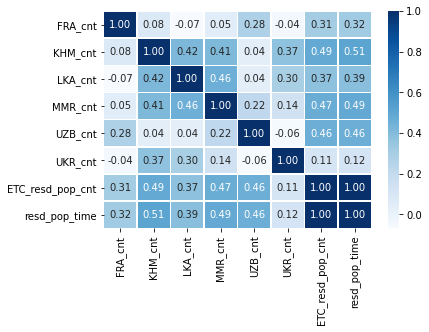

In [49]:
sns.heatmap(data=longterm_frgn3.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [50]:
longterm_frgn_file = longterm_frgn2.drop('resd_pop_time', axis = 1)

In [51]:
longterm_frgn_file.to_csv('longterm_frgn.csv', encoding = 'cp949', index = None)

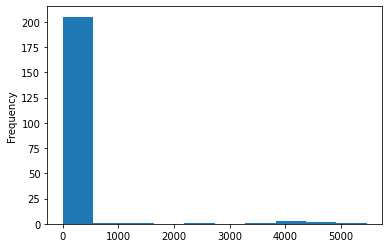

In [52]:
longterm_frgn2['FRA_cnt'].plot.hist()

In [53]:
longterm_frgn2['FRA_cnt'].describe()

count     215.000000
mean      164.958486
std       802.389126
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5466.654700
Name: FRA_cnt, dtype: float64

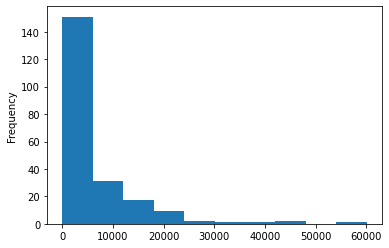

In [54]:
longterm_frgn2['KHM_cnt'].plot.hist()

In [55]:
longterm_frgn2['KHM_cnt'].describe()

count      215.000000
mean      4997.727609
std       8699.463178
min          0.000000
25%          0.000000
50%         34.413600
75%       8316.366400
max      60109.928200
Name: KHM_cnt, dtype: float64

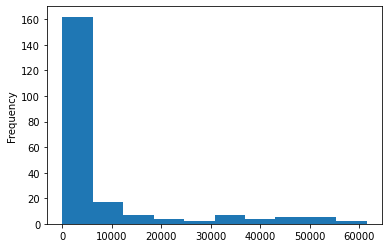

In [56]:
longterm_frgn2['LKA_cnt'].plot.hist()

In [57]:
longterm_frgn2['LKA_cnt'].describe()

count      215.000000
mean      6945.942984
std      13746.060725
min          0.000000
25%          0.000000
50%          6.661200
75%       5636.161600
max      61539.561500
Name: LKA_cnt, dtype: float64

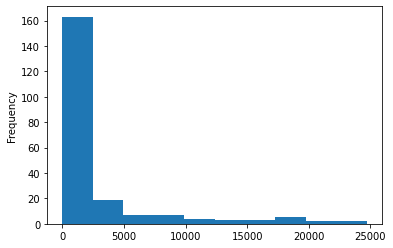

In [58]:
longterm_frgn2['MMR_cnt'].plot.hist()

In [59]:
longterm_frgn2['MMR_cnt'].describe()

count      215.000000
mean      2358.081680
std       5054.993817
min          0.000000
25%          0.000000
50%          0.000000
75%       1198.873700
max      24703.611400
Name: MMR_cnt, dtype: float64

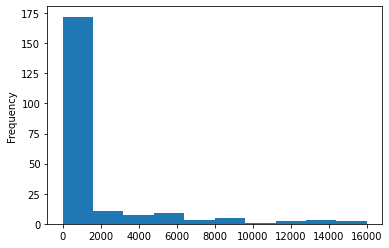

In [60]:
longterm_frgn2['UZB_cnt'].plot.hist()

In [61]:
longterm_frgn2['UZB_cnt'].describe()

count      215.000000
mean      1311.777238
std       3102.283650
min          0.000000
25%          0.000000
50%          0.000000
75%        233.259850
max      16011.237900
Name: UZB_cnt, dtype: float64

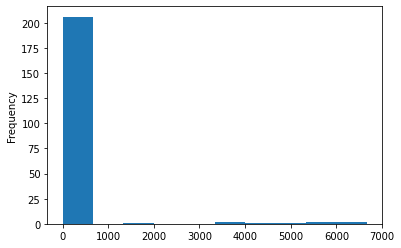

In [62]:
longterm_frgn2['UKR_cnt'].plot.hist()

In [63]:
longterm_frgn2['UKR_cnt'].describe()

count     215.000000
mean      200.291620
std       999.392713
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      6667.428200
Name: UKR_cnt, dtype: float64

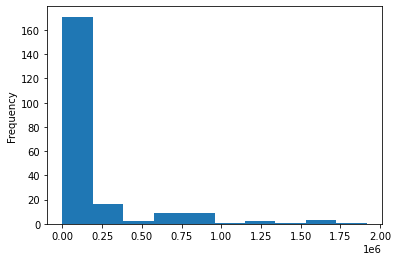

In [64]:
longterm_frgn2['ETC_resd_pop_cnt'].plot.hist()

In [65]:
longterm_frgn2['ETC_resd_pop_cnt'].describe()

count    2.150000e+02
mean     1.933921e+05
std      3.339863e+05
min      0.000000e+00
25%      2.127020e+04
50%      7.116162e+04
75%      1.731264e+05
max      1.916024e+06
Name: ETC_resd_pop_cnt, dtype: float64

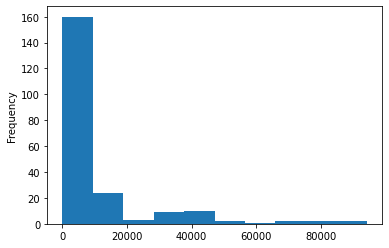

In [66]:
longterm_frgn2['resd_pop_time'].plot.hist()

In [67]:
longterm_frgn2['resd_pop_time'].describe()

count      215.000000
mean     10376.796309
std      16860.294017
min          0.000000
25%       1241.208300
50%       4329.321000
75%       9633.514500
max      94275.710600
Name: resd_pop_time, dtype: float64

In [72]:
longterm_frgn2['FRA_cnt'] = np.log(longterm_frgn2['FRA_cnt'] + 1)
longterm_frgn2['KHM_cnt'] = np.log(longterm_frgn2['KHM_cnt'] + 1)
longterm_frgn2['LKA_cnt'] = np.log(longterm_frgn2['LKA_cnt'] + 1)
longterm_frgn2['MMR_cnt'] = np.log(longterm_frgn2['MMR_cnt'] + 1)
longterm_frgn2['UZB_cnt'] = np.log(longterm_frgn2['UZB_cnt'] + 1)
longterm_frgn2['UKR_cnt'] = np.log(longterm_frgn2['UKR_cnt'] + 1)
longterm_frgn2['ETC_resd_pop_cnt'] = np.log(longterm_frgn2['ETC_resd_pop_cnt']+1)
longterm_frgn2['resd_pop_time'] = np.log(longterm_frgn2['resd_pop_time'] + 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
longtermfrgn_final = longterm_frgn2.copy()

In [75]:
longtermfrgn_final = longtermfrgn_final.dropna(axis = 1).reset_index()

In [76]:
longtermfrgn_final['FRA_cnt'] = scaler.fit_transform(longterm_frgn2[['FRA_cnt']])
longtermfrgn_final['KHM_cnt'] = scaler.fit_transform(longterm_frgn2[['KHM_cnt']])
longtermfrgn_final['LKA_cnt'] = scaler.fit_transform(longterm_frgn2[['LKA_cnt']])
longtermfrgn_final['MMR_cnt'] = scaler.fit_transform(longterm_frgn2[['MMR_cnt']])
longtermfrgn_final['UZB_cnt'] = scaler.fit_transform(longterm_frgn2[['UZB_cnt']])
longtermfrgn_final['UKR_cnt'] = scaler.fit_transform(longterm_frgn2[['UKR_cnt']])
longtermfrgn_final['ETC_resd_pop_cnt'] = scaler.fit_transform(longterm_frgn2[['ETC_resd_pop_cnt']])
longtermfrgn_final['resd_pop_time'] = scaler.fit_transform(longterm_frgn2[['resd_pop_time']])

In [77]:
longtermfrgn_final

,index,year,month,emd_nm,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,resd_pop_time,ETC_resd_pop_cnt
0,0,2018,1,건입동,-0.271334,-1.004382,1.028153,1.172061,-0.633074,-0.231418,0.312328,0.339899
1,1,2018,1,구좌읍,-0.271334,1.123433,1.143021,1.391831,1.628545,-0.231418,0.507961,0.614244
2,2,2018,1,남원읍,-0.271334,1.140698,1.195380,1.384516,-0.633074,-0.231418,0.499099,0.531926
3,3,2018,1,노형동,3.825682,1.129504,0.978036,1.345867,1.572603,-0.231418,1.097258,1.477064
4,4,2018,1,대륜동,-0.271334,1.017908,-0.993827,-0.742340,-0.633074,-0.231418,0.318439,0.392017
5,5,2018,1,대정읍,-0.271334,1.087171,1.214263,1.404142,-0.633074,-0.231418,0.947338,1.236257
6,6,2018,1,대천동,-0.271334,1.073125,-0.993827,-0.742340,-0.633074,-0.231418,0.321495,0.334215
7,7,2018,1,도두동,-0.271334,1.105465,-0.993827,-0.742340,-0.633074,-0.231418,0.135894,0.071775
8,8,2018,1,동홍동,-0.271334,1.086983,1.019612,-0.742340,1.661965,-0.231418,0.580824,0.698171
9,9,2018,1,봉개동,-0.271334,-1.004382,0.882601,-0.742340,-0.633074,-0.231418,0.099415,0.055877


In [78]:
longtermfrgn_final_merge = food_waste_month.merge(longtermfrgn_final, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [79]:
longtermfrgn_final_merge

,year,month,emd_nm,sum(em_g),index,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,resd_pop_time,ETC_resd_pop_cnt
0,2018,1,건입동,0.064537,0,-0.271334,-1.004382,1.028153,1.172061,-0.633074,-0.231418,0.312328,0.339899
1,2018,1,남원읍,-0.011915,2,-0.271334,1.140698,1.195380,1.384516,-0.633074,-0.231418,0.499099,0.531926
2,2018,1,노형동,1.909326,3,3.825682,1.129504,0.978036,1.345867,1.572603,-0.231418,1.097258,1.477064
3,2018,1,대륜동,0.308722,4,-0.271334,1.017908,-0.993827,-0.742340,-0.633074,-0.231418,0.318439,0.392017
4,2018,1,대정읍,-0.103599,5,-0.271334,1.087171,1.214263,1.404142,-0.633074,-0.231418,0.947338,1.236257
5,2018,1,대천동,0.238051,6,-0.271334,1.073125,-0.993827,-0.742340,-0.633074,-0.231418,0.321495,0.334215
6,2018,1,도두동,-1.124307,7,-0.271334,1.105465,-0.993827,-0.742340,-0.633074,-0.231418,0.135894,0.071775
7,2018,1,동홍동,1.066900,8,-0.271334,1.086983,1.019612,-0.742340,1.661965,-0.231418,0.580824,0.698171
8,2018,1,봉개동,-1.487802,9,-0.271334,-1.004382,0.882601,-0.742340,-0.633074,-0.231418,0.099415,0.055877
9,2018,1,삼도1동,0.529026,10,-0.271334,-1.004382,-0.993827,-0.742340,1.725341,-0.231418,0.267127,0.233618


In [80]:
longtermfrgn_final_merge.dropna(axis = 0)

,year,month,emd_nm,sum(em_g),index,FRA_cnt,KHM_cnt,LKA_cnt,MMR_cnt,UZB_cnt,UKR_cnt,resd_pop_time,ETC_resd_pop_cnt
0,2018,1,건입동,0.064537,0,-0.271334,-1.004382,1.028153,1.172061,-0.633074,-0.231418,0.312328,0.339899
1,2018,1,남원읍,-0.011915,2,-0.271334,1.140698,1.195380,1.384516,-0.633074,-0.231418,0.499099,0.531926
2,2018,1,노형동,1.909326,3,3.825682,1.129504,0.978036,1.345867,1.572603,-0.231418,1.097258,1.477064
3,2018,1,대륜동,0.308722,4,-0.271334,1.017908,-0.993827,-0.742340,-0.633074,-0.231418,0.318439,0.392017
4,2018,1,대정읍,-0.103599,5,-0.271334,1.087171,1.214263,1.404142,-0.633074,-0.231418,0.947338,1.236257
5,2018,1,대천동,0.238051,6,-0.271334,1.073125,-0.993827,-0.742340,-0.633074,-0.231418,0.321495,0.334215
6,2018,1,도두동,-1.124307,7,-0.271334,1.105465,-0.993827,-0.742340,-0.633074,-0.231418,0.135894,0.071775
7,2018,1,동홍동,1.066900,8,-0.271334,1.086983,1.019612,-0.742340,1.661965,-0.231418,0.580824,0.698171
8,2018,1,봉개동,-1.487802,9,-0.271334,-1.004382,0.882601,-0.742340,-0.633074,-0.231418,0.099415,0.055877
9,2018,1,삼도1동,0.529026,10,-0.271334,-1.004382,-0.993827,-0.742340,1.725341,-0.231418,0.267127,0.233618


In [81]:
longtermfrgn_x = longtermfrgn_final_merge.loc[:, ['FRA_cnt', 'KHM_cnt', 'LKA_cnt', 'MMR_cnt', 'UZB_cnt', 'UKR_cnt', 'ETC_resd_pop_cnt', 'resd_pop_time']]
longtermfrgn_y = longtermfrgn_final_merge.loc[:, ['sum(em_g)']]

In [82]:
longtermfrgn_x = sm.add_constant(longtermfrgn_x)

In [83]:
model = sm.OLS(longtermfrgn_y, longtermfrgn_x)

In [84]:
result = model.fit()

In [85]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sum(em_g)   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     9.229
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.39e-10
Time:                        09:12:49   Log-Likelihood:                -223.25
No. Observations:                 185   AIC:                             464.5
Df Residuals:                     176   BIC:                             493.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0055      0.062     -0.088      0.930      -0.128       0.117
FRA_cnt              0.0043      0.061      0.070      0.944      -0.117       0.125
KHM_cnt              0.2272      0.069      3.301      0.001       0.091       0.363
LKA_cnt             -0.1623      0.077     -2.121      0.035      -0.313      -0.011
MMR_cnt              0.0388      0.079      0.488      0.626      -0.118       0.196
UZB_cnt              0.0837      0.067      1.256      0.211      -0.048       0.215
UKR_cnt             -0.4108      0.063     -6.509      0.000      -0.535      -0.286
ETC_resd_pop_cnt     0.4019      0.182      2.206      0.029       0.042       0.761
resd_pop_time       -0.2413      0.200     -1.204      0.230      -0.637       0.154
==============================================================================
Omnibus:                        7.715   Durbin-Watson:                   2.475
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.689
Skew:                          -0.460   Prob(JB):                       0.0214
Kurtosis:                       2.612   Cond. No.                         7.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""